# 01. Import Libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# 02. Import Data

In [2]:
path = r'C:\Users\esteb\OneDrive\Desktop\2025_Machine Learning'

In [3]:
df_clim = pd.read_csv(os.path.join(path, '02_Data', 'Original Data', 'Weather-prediction-dataset-processed.csv'))

In [4]:
df_pls = pd.read_csv(os.path.join(path, '02_Data', 'Original Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

# 03. Explore and Manipulated Data

In [5]:
# View All Columns
for col in df_clim.columns:
    print(col)

DATE
MONTH
BASEL_cloud_cover
BASEL_wind_speed
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_snow_depth
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BELGRADE_cloud_cover
BELGRADE_humidity
BELGRADE_pressure
BELGRADE_global_radiation
BELGRADE_precipitation
BELGRADE_sunshine
BELGRADE_temp_mean
BELGRADE_temp_min
BELGRADE_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_min
BUDAPEST_temp_max
DEBILT_cloud_cover
DEBILT_wind_speed
DEBILT_humidity
DEBILT_pressure
DEBILT_global_radiation
DEBILT_precipitation
DEBILT_sunshine
DEBILT_temp_mean
DEBILT_temp_min
DEBILT_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_snow_depth
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
GDANSK_cloud_cover
GDANSK

In [6]:
# Drop Station Columns not needed
stations_to_drop = ['DATE', 'MONTH', 'GDANSK', 'ROMA', 'TOURS']

cols_to_drop = [
    col for col in df_clim.columns
    if any(station in col.upper() for station in stations_to_drop)
]

df_clim = df_clim.drop(columns=cols_to_drop)


In [7]:
X = df_clim

In [8]:
# View All Columns
for col in X.columns:
    print(col)

BASEL_cloud_cover
BASEL_wind_speed
BASEL_humidity
BASEL_pressure
BASEL_global_radiation
BASEL_precipitation
BASEL_snow_depth
BASEL_sunshine
BASEL_temp_mean
BASEL_temp_min
BASEL_temp_max
BELGRADE_cloud_cover
BELGRADE_humidity
BELGRADE_pressure
BELGRADE_global_radiation
BELGRADE_precipitation
BELGRADE_sunshine
BELGRADE_temp_mean
BELGRADE_temp_min
BELGRADE_temp_max
BUDAPEST_cloud_cover
BUDAPEST_humidity
BUDAPEST_pressure
BUDAPEST_global_radiation
BUDAPEST_precipitation
BUDAPEST_sunshine
BUDAPEST_temp_mean
BUDAPEST_temp_min
BUDAPEST_temp_max
DEBILT_cloud_cover
DEBILT_wind_speed
DEBILT_humidity
DEBILT_pressure
DEBILT_global_radiation
DEBILT_precipitation
DEBILT_sunshine
DEBILT_temp_mean
DEBILT_temp_min
DEBILT_temp_max
DUSSELDORF_cloud_cover
DUSSELDORF_wind_speed
DUSSELDORF_humidity
DUSSELDORF_pressure
DUSSELDORF_global_radiation
DUSSELDORF_precipitation
DUSSELDORF_snow_depth
DUSSELDORF_sunshine
DUSSELDORF_temp_mean
DUSSELDORF_temp_min
DUSSELDORF_temp_max
HEATHROW_cloud_cover
HEATHROW_humidi

In [9]:
# Check Data
df_pls.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Create an 'y' matrix by dropping the unneeded columns
y = df_pls.drop(['DATE'], axis=1)

In [11]:
# View All Columns
for col in y.columns:
    print(col)

BASEL_pleasant_weather
BELGRADE_pleasant_weather
BUDAPEST_pleasant_weather
DEBILT_pleasant_weather
DUSSELDORF_pleasant_weather
HEATHROW_pleasant_weather
KASSEL_pleasant_weather
LJUBLJANA_pleasant_weather
MAASTRICHT_pleasant_weather
MADRID_pleasant_weather
MUNCHENB_pleasant_weather
OSLO_pleasant_weather
SONNBLICK_pleasant_weather
STOCKHOLM_pleasant_weather
VALENTIA_pleasant_weather


In [12]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=37)

In [13]:
# View shape of training and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [14]:
# Converting df to numpy array
X_test = np.array(X_test) 
X_train = np.array(X_train)

# 04. Decision Tree

[Text(0.3707336152768134, 0.9821428571428571, 'x[49] <= 17.95\ngini = 0.314\nsamples = 17212\nvalue = [[12978, 4234]\n[11216, 5996]\n[11633, 5579]\n[13890, 3322]\n[13531, 3681]\n[13498, 3714]\n[14436, 2776]\n[12426, 4786]\n[13646, 3566]\n[9516, 7696]\n[13642, 3570]\n[14566, 2646]\n[17212, 0]\n[14295, 2917]\n[16349, 863]]'),
 Text(0.06601507604293891, 0.9464285714285714, 'x[98] <= 17.95\ngini = 0.099\nsamples = 10782\nvalue = [[10123.0, 659.0]\n[9060.0, 1722.0]\n[9508.0, 1274.0]\n[10694.0, 88.0]\n[10782.0, 0.0]\n[10156.0, 626.0]\n[10703.0, 79.0]\n[9831.0, 951.0]\n[10709.0, 73.0]\n[8020.0, 2762.0]\n[10373.0, 409.0]\n[10535.0, 247.0]\n[10782.0, 0.0]\n[10531.0, 251.0]\n[10618.0, 164.0]]'),
 Text(0.21837434565987618, 0.9642857142857142, 'True  '),
 Text(0.019045843511211323, 0.9107142857142857, 'x[19] <= 17.95\ngini = 0.028\nsamples = 7547\nvalue = [[7428.0, 119.0]\n[6863.0, 684.0]\n[7197.0, 350.0]\n[7535.0, 12.0]\n[7547.0, 0.0]\n[7504.0, 43.0]\n[7525.0, 22.0]\n[7332.0, 215.0]\n[7523.0, 24.

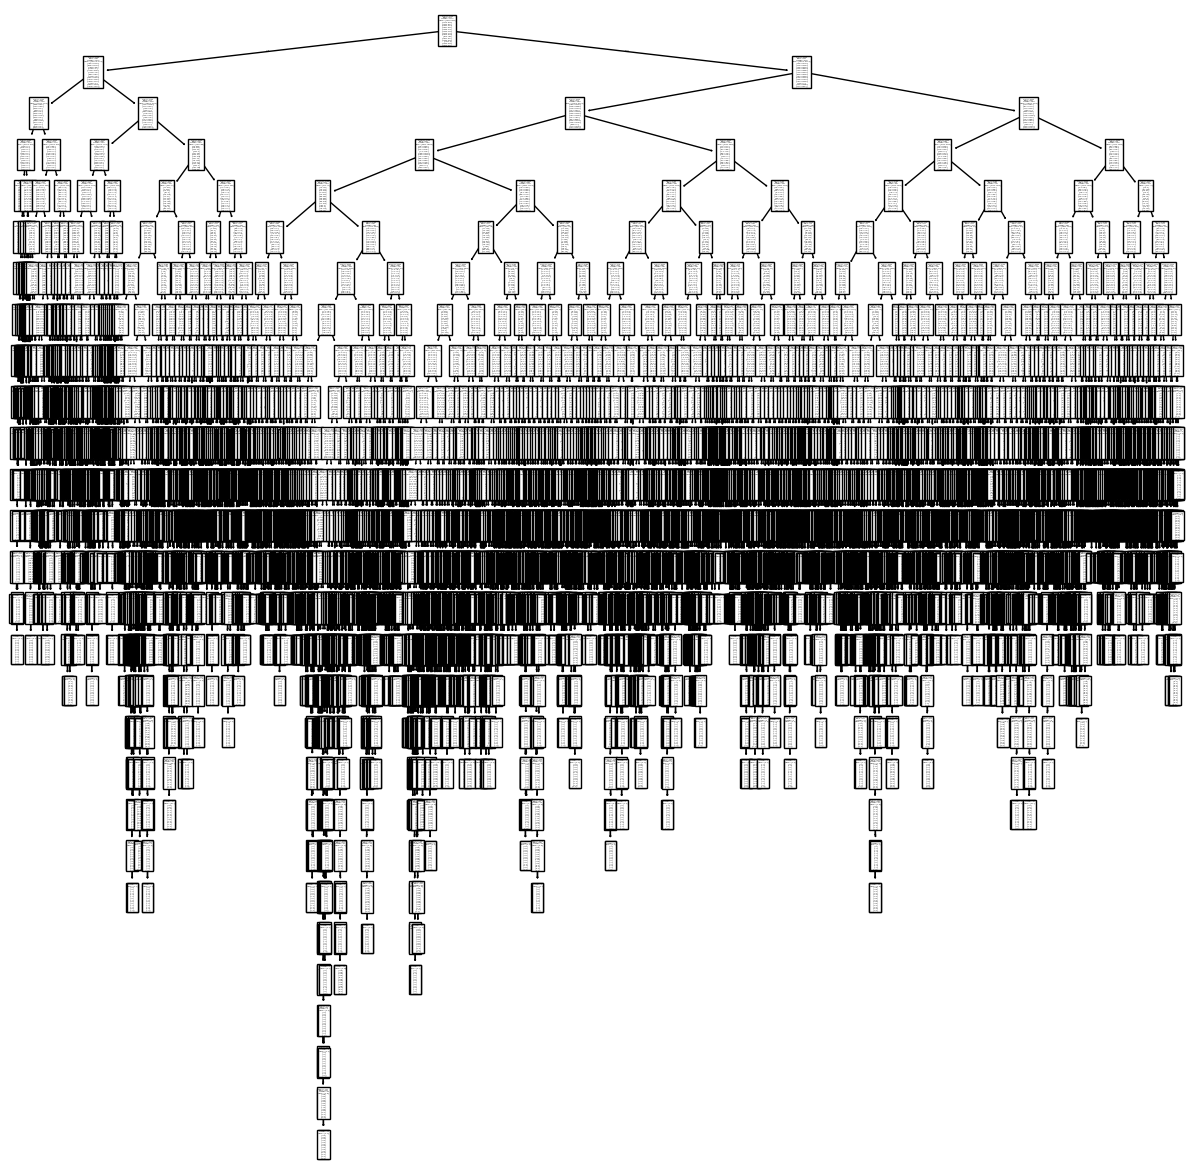

In [15]:
# Run Decision Tree classifier
iris_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
iris_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(iris_dt)

In [16]:
# Generate Prediction for test set
y_pred = iris_dt.predict(X_test)

In [17]:
# What is the training accuracy score? Using the cross validation method
y_pred_train = iris_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(iris_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6059140199454583


In [18]:
# Generate Classification Report
report = classification_report(y_train, y_pred_train)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4234
           1       1.00      1.00      1.00      5996
           2       1.00      1.00      1.00      5579
           3       1.00      1.00      1.00      3322
           4       1.00      1.00      1.00      3681
           5       1.00      1.00      1.00      3714
           6       1.00      1.00      1.00      2776
           7       1.00      1.00      1.00      4786
           8       1.00      1.00      1.00      3566
           9       1.00      1.00      1.00      7696
          10       1.00      1.00      1.00      3570
          11       1.00      1.00      1.00      2646
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00      2917
          14       1.00      1.00      1.00       863

   micro avg       1.00      1.00      1.00     55346
   macro avg       0.93      0.93      0.93     55346
weighted avg       1.00   

C:\Users\esteb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\esteb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\esteb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\esteb\anaconda3\Lib\site-package

In [19]:
# All the Different Locations
locations = list({x.split("_")[0] for x in df_clim.columns})
locations.sort()
print(locations)

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [20]:
y_pred = iris_dt.predict(X_test)


C:\Users\esteb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


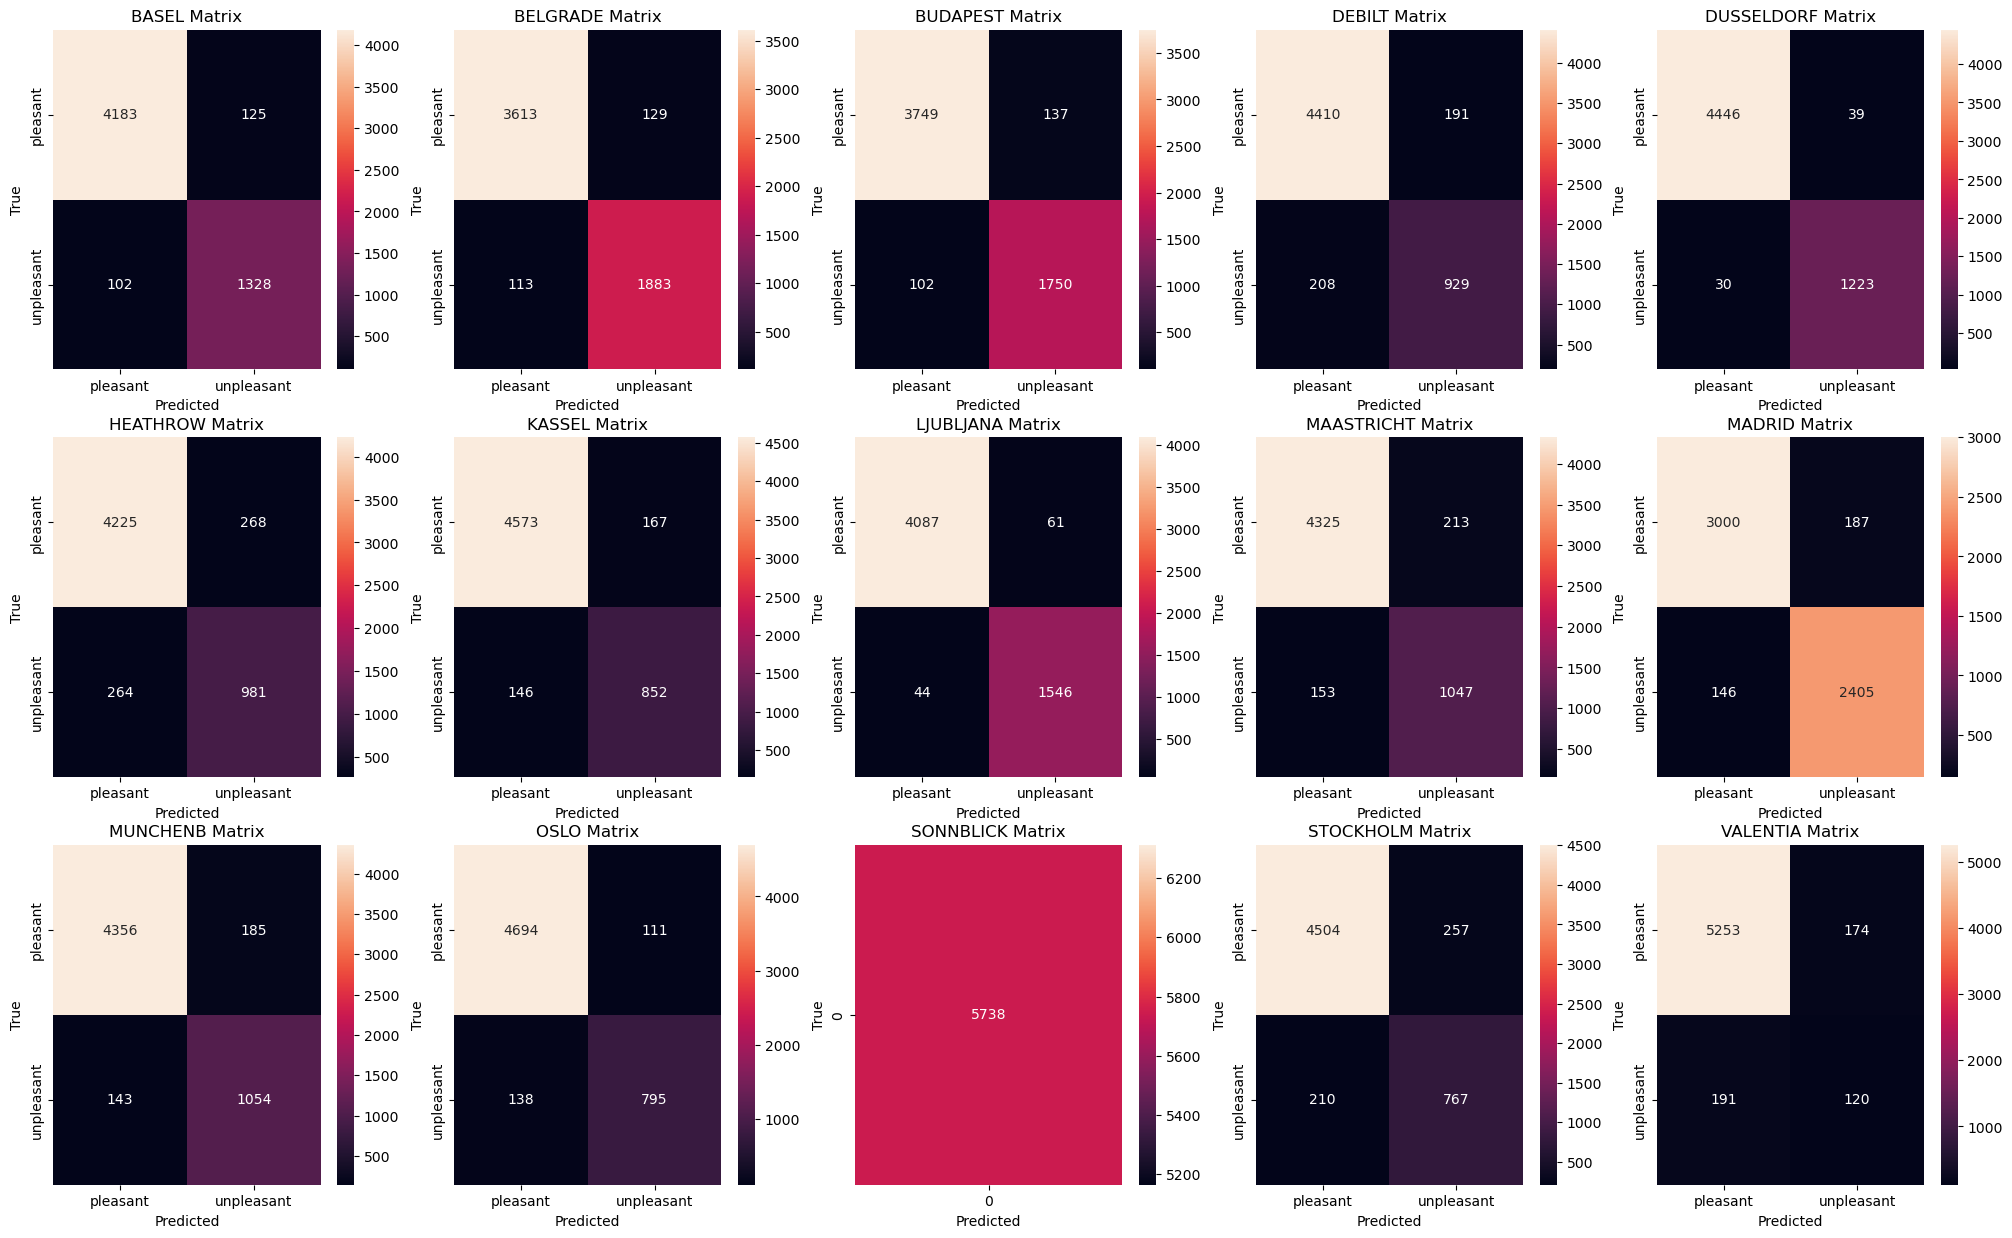

In [21]:
key = "_pleasant_weather"
stations = []
fig, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']
count = 0

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.iloc[:, count], y_pred[:, count])
        sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        ax[i,j].set_xlabel('Predicted')
        ax[i,j].set_ylabel('True')
        ax[i,j].set_title(name + ' Matrix')
        
        # Only set tick labels if matrix is 2x2
        if cm.shape == (2,2):
            ax[i,j].xaxis.set_ticklabels(labels)
            ax[i,j].yaxis.set_ticklabels(labels)
        
        count += 1
